In [1]:
%load_ext autoreload
%autoreload 2 
# !apt-get install -y xvfb

In [12]:
import pandas as pd
import numpy as np
import os


'/home/sneha'

## Data Loading

In [13]:
df = pd.read_excel(os.path.abspath("/home/sneha/airway_tree_pilot.xlsx"), sheet_name=0)

In [14]:
df.drop(columns = ["manufacturer", "model"], inplace=True)

In [15]:
df.describe()


,idno,startbpid,endbpid,centerlinelength,angle,dircosx,dircosy,dircosz,avginnerarea,generation,weibel_generation
count,7.768300e+04,77683.000000,77683.000000,77683.000000,77454.000000,77683.000000,77683.000000,77683.000000,77683.000000,77683.000000,77683.000000
mean,5.986778e+06,149.658226,197.128509,10.614453,143.201617,-0.021328,0.056368,0.138202,11.161638,6.539384,7.338839
std,1.832951e+06,121.756964,130.566550,9.629416,24.407202,0.552013,0.542999,0.614584,25.017431,1.918851,2.273523
min,3.011950e+06,-1.000000,1.000000,0.498047,4.410540,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,4.017080e+06,51.000000,92.000000,4.138575,132.688500,-0.476731,-0.381630,-0.392263,4.149160,5.000000,6.000000
50%,7.012039e+06,120.000000,180.000000,8.742300,149.928000,0.000000,0.061056,0.229416,6.168230,7.000000,7.000000
75%,8.010528e+06,220.000000,280.000000,14.169850,160.462500,0.436436,0.497468,0.704271,10.071250,8.000000,9.000000
max,8.023336e+06,744.000000,747.000000,128.734000,180.000000,1.000000,1.000000,1.000000,2343.240000,16.000000,17.000000


## Data Exploration - Initial Stats 

In [6]:
print("There are 227 participants, each participant has on average 342 \pm 110 branch segments")

df.groupby("idno").agg(
    {
        "anatomicalname":"count"
    }
).rename(
    columns = {
        "anatomicalname":"num_branch_segments"
    }
).sort_values(
    by="num_branch_segments",
    ascending=False
).describe().round(0).astype(int)



There are 227 participants, each participant has on average 342 \pm 110 branch segments


,num_branch_segments
count,227
mean,342
std,110
min,98
25%,264
50%,331
75%,408
max,744


In [7]:
print("Number of weibel generations per participant")

weibel = df.groupby("idno").agg(
    {
        "weibel_generation":["max", "mean"]
    }
)






new_cols = [first+"_"+second for (first, second) in weibel.columns]
weibel.columns = new_cols
weibel.describe().round().astype(int)

Number of weibel generations per participant


,weibel_generation_max,weibel_generation_mean
count,227,227
mean,13,7
std,1,1
min,9,5
25%,12,7
50%,13,7
75%,14,8
max,17,9


In [8]:
print(f"{(df['anatomicalname']=='-').sum()/len(df)*100:.2f}% of branch segments dont have anatomical names")

df.groupby("anatomicalname").agg({"idno":"count"}).sort_values(by="idno", ascending=False)

# what is unnamed?

89.77% of branch segments dont have anatomical names


,idno
anatomicalname,
-,69737
LUL,227
Trachea,227
RUL,227
RMB,227
...,...
unnamed-169,1
unnamed-4,1
unnamed-395,1


In [9]:
print("All branches start at trachea and end on segment number 350\pm 113")
df.groupby("idno").agg({"startbpid":"min", "endbpid":max}).describe().round()

All branches start at trachea and end on segment number 350\pm 113


,startbpid,endbpid
count,227.0,227.0
mean,-1.0,350.0
std,0.0,113.0
min,-1.0,101.0
25%,-1.0,270.0
50%,-1.0,335.0
75%,-1.0,414.0
max,-1.0,747.0


count    69251.000000
mean        12.642439
std         26.112776
min          1.297890
25%          4.787525
50%          6.711200
75%         10.898450
max       2343.240000
Name: avginnerarea, dtype: float64

/tmp/ipykernel_7986/2874537006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier["log_diameter"] = np.log(2*np.sqrt(df_no_outlier["avginnerarea"]/np.pi))


<AxesSubplot:xlabel='weibel_generation'>

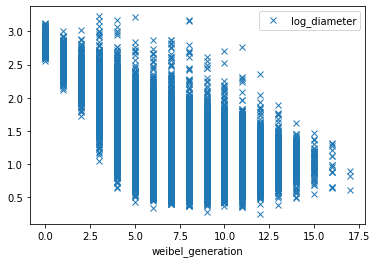

In [57]:
display(df[df.avginnerarea > 0].avginnerarea.describe())
# group by weibel dim then plot the histogram
# excluding 3 outliers above 500 CSA --> Question error?
df_no_outlier = df[(df.avginnerarea > 0) & (df.avginnerarea < 500)]
df_no_outlier["log_diameter"] = np.log(2*np.sqrt(df_no_outlier["avginnerarea"]/np.pi))
df_no_outlier.plot(y="log_diameter", x="weibel_generation", style="x")

In [60]:
np.polyfit(x=df_no_outlier.weibel_generation.values, y= df_no_outlier.log_diameter.values, deg=1) # outputs coeff of HIGHEST degree first
# not really woking --> could group by person, take avg per person per generation and tyr there maybe less noise?
# generate plots on the line


# regression = ols(x=df_no_outlier.weibel_generation, y=df_no_outlier.log_diameter)
# display(regression.summary) # slicing to only use last 30 points
# data = pd.DataFrame(index=x, data={'y': y, 'trend': trend})
# data.plot()

# df_no_outlier.plot(y="log_diameter", x="weibel_generation", style="x")


array([-0.09263583,  1.82570835])

0.675823539255693